In [36]:
#https://stackoverflow.com/questions/54544285/is-it-possible-to-do-multivariate-multi-step-forecasting-using-fb-prophet

In [37]:
import pandas as pd
from fbprophet import Prophet

In [38]:
data = pd.read_csv('data_jour.csv')

In [39]:
data.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),TZ2 MISC:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone Air Temperature [C](TimeStep),TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),TZ1 WORK:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),TZ2 MISC:Zone Air Temperature [C](TimeStep),TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),TZ2 MISC:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Electricity:Facility [J](TimeStep)
0,01/01 00:15:00,5.525,0.0,0.0,10.954265,5.0,22.5,11.702454,5.0,35.0,296776.445126
1,01/01 00:30:00,4.650,0.0,0.0,10.836157,5.0,22.5,11.596719,5.0,35.0,296776.445126
2,01/01 00:45:00,3.775,0.0,0.0,10.702856,5.0,22.5,11.474617,5.0,35.0,296776.445126
3,01/01 01:00:00,2.900,0.0,0.0,10.549633,5.0,22.5,11.335958,5.0,35.0,296776.445126
4,01/01 01:15:00,3.250,0.0,0.0,10.460999,5.0,22.5,11.247975,5.0,35.0,296776.445126


In [40]:
data.tail()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),TZ2 MISC:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone Air Temperature [C](TimeStep),TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),TZ1 WORK:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),TZ2 MISC:Zone Air Temperature [C](TimeStep),TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),TZ2 MISC:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Electricity:Facility [J](TimeStep)
187,01/02 23:00:00,2.300,0.0,0.0,10.147827,5.0,22.5,11.007921,5.0,35.0,296776.445126
188,01/02 23:15:00,2.275,0.0,0.0,10.093503,5.0,22.5,10.951416,5.0,35.0,296776.445126
189,01/02 23:30:00,2.250,0.0,0.0,10.022614,5.0,22.5,10.883589,5.0,35.0,296776.445126
190,01/02 23:45:00,2.225,0.0,0.0,9.953563,5.0,22.5,10.813849,5.0,35.0,296776.445126
191,01/02 24:00:00,2.200,0.0,0.0,9.893597,5.0,22.5,10.750897,5.0,35.0,296776.445126


In [41]:
data.columns

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
       'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
       'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
       'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
       'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
       'TZ1 WORK:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',
       'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
       'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
       'TZ2 MISC:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',
       'Electricity:Facility [J](TimeStep) '],
      dtype='object')

In [42]:
df_final = data.reset_index()[['Date/Time', 
                               'Electricity:Facility [J](TimeStep) ',
                               'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                               'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
                               'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
                               'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
                               'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
                              'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                              'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)']].rename({'Date/Time' : 'ds',
                               'Electricity:Facility [J](TimeStep) ' : 'y',
                               'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)' : 'temp',
                               'TZ2 MISC:Zone People Occupant Count [](TimeStep)' : 'occ1',
                               'TZ1 WORK:Zone People Occupant Count [](TimeStep)' : 'occ2',
                               'TZ1 WORK:Zone Air Temperature [C](TimeStep)'     : 'tempi1',
                               'TZ2 MISC:Zone Air Temperature [C](TimeStep)'     : 'tempi2', 
                               'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)' :'termo1',
                                'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)' : 'termo2'}, axis = 'columns')

In [43]:
data['Date/Time']=data['Date/Time'].apply(lambda x :  x.split(' ')[1]+'/2018 '+ x.split(' ')[3])

In [44]:
pd.to_datetime(data['Date/Time'], errors = 'coerce')

0     2018-01-01 00:15:00
1     2018-01-01 00:30:00
2     2018-01-01 00:45:00
3     2018-01-01 01:00:00
4     2018-01-01 01:15:00
              ...        
187   2018-01-02 23:00:00
188   2018-01-02 23:15:00
189   2018-01-02 23:30:00
190   2018-01-02 23:45:00
191                   NaT
Name: Date/Time, Length: 192, dtype: datetime64[ns]

In [45]:
df_final['ds'] = pd.to_datetime(data['Date/Time'],format='%m/%d/%Y %H:%M:%S', errors = 'coerce')

In [46]:
df_final['ds'] 

0     2018-01-01 00:15:00
1     2018-01-01 00:30:00
2     2018-01-01 00:45:00
3     2018-01-01 01:00:00
4     2018-01-01 01:15:00
              ...        
187   2018-01-02 23:00:00
188   2018-01-02 23:15:00
189   2018-01-02 23:30:00
190   2018-01-02 23:45:00
191                   NaT
Name: ds, Length: 192, dtype: datetime64[ns]

In [47]:
test= pd.read_csv('data_test_jour.csv')
df_test = test.reset_index()[[
                               'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                               'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
                               'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
                               'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
                               'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
                              'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                              'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)']].rename({
                               'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)' : 'temp',
                               'TZ2 MISC:Zone People Occupant Count [](TimeStep)' : 'occ1',
                               'TZ1 WORK:Zone People Occupant Count [](TimeStep)' : 'occ2',
                               'TZ1 WORK:Zone Air Temperature [C](TimeStep)'     : 'tempi1',
                               'TZ2 MISC:Zone Air Temperature [C](TimeStep)'     : 'tempi2', 
                               'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)' :'termo1',
                                'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)' : 'termo2'}, axis = 'columns')

In [48]:
m = Prophet(interval_width=0.95)
m.add_regressor('temp', standardize= False)
m.add_regressor('occ1', standardize= False)
m.add_regressor('occ2', standardize= False)
m.add_regressor('tempi1', standardize= False)
m.add_regressor('tempi1', standardize= False)
m.add_regressor('termo1', standardize= False)
m.add_regressor('termo2', standardize= False)

In [49]:
m.fit(df_final.dropna())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future = m.make_future_dataframe(periods=24*4, freq='15min')
future["y"] = df_final["y"]
future["temp"] = df_test['temp']
future["occ1"] = df_test['occ1']
future["occ2"] = df_test['occ2']
future["tempi1"] = df_test['tempi1']
future["tempi2"] = df_test['tempi2']
future["termo1"] = df_test['termo1']
future["termo2"] = df_test['termo2']
future.tail()


,ds,y,temp,occ1,occ2,tempi1,tempi2,termo1,termo2
281,2018-01-03 22:45:00,NaN,3.150,0.0,0.0,10.637632,11.475399,5.0,5.0
282,2018-01-03 23:00:00,NaN,3.075,0.0,0.0,10.480473,11.297259,5.0,5.0
283,2018-01-03 23:15:00,NaN,3.000,0.0,0.0,10.396477,11.201035,5.0,5.0
284,2018-01-03 23:30:00,NaN,2.950,0.0,0.0,10.321509,11.125879,5.0,5.0
285,2018-01-03 23:45:00,NaN,2.900,0.0,0.0,10.242823,11.050153,5.0,5.0


In [51]:
forecast = m.predict(future.interpolate())
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()


Exception ignored in: <function tqdm.__del__ at 0x00000243695021F0>
Traceback (most recent call last):
  File "C:\Users\ykaddour\Miniconda3\lib\site-packages\tqdm\std.py", line 1128, in __del__
    self.close()
  File "C:\Users\ykaddour\Miniconda3\lib\site-packages\tqdm\notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'sp'
Exception ignored in: <function tqdm.__del__ at 0x00000243695021F0>
Traceback (most recent call last):
  File "C:\Users\ykaddour\Miniconda3\lib\site-packages\tqdm\std.py", line 1128, in __del__
    self.close()
  File "C:\Users\ykaddour\Miniconda3\lib\site-packages\tqdm\notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'sp'
Exception ignored in: <function tqdm.__del__ at 0x00000243695021F0>
Traceback (most recent call last):
  File "C:\Users\ykaddour\Miniconda3\lib\site-packages\tqdm\std.py", line 1128, in __del__
    self.close()
  File "C:\Us

,ds,yhat,yhat_lower,yhat_upper
281,2018-01-03 22:45:00,-1.396308e+06,-2.426504e+06,-345283.922440
282,2018-01-03 23:00:00,-1.417056e+06,-2.464273e+06,-431226.517055
283,2018-01-03 23:15:00,-1.434944e+06,-2.560038e+06,-392512.637273
284,2018-01-03 23:30:00,-1.453563e+06,-2.559680e+06,-428276.069179
285,2018-01-03 23:45:00,-1.472327e+06,-2.558140e+06,-400851.939662


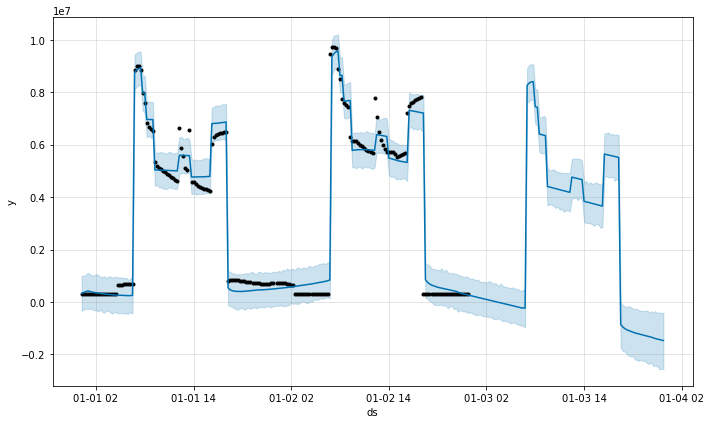

In [52]:
fig = m.plot(forecast)

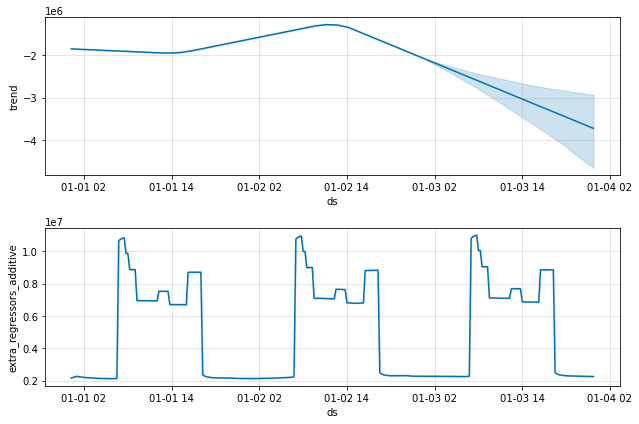

In [53]:
fig2 = m.plot_components(forecast)


In [54]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='24 Hours', period='6 Hours', horizon = '12 Hours')
df_cv.head()


INFO:prophet:Making 2 forecasts with cutoffs between 2018-01-02 05:45:00 and 2018-01-02 11:45:00


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html